In [1]:
import torch
import numpy as np
# import cv2
# import matplotlib.pylab as plt

print(f"torch version:{torch.__version__}, cuda version:{torch.version.cuda}, cuda is available:{torch.cuda.is_available()}")

SplitLine = "\n==============================\n"

def PrintTensor(name:str, x:torch.Tensor):
    print(f"{name}:\n", x)
    print(f"{name}的维度数(秩):{x.dim()}; 形状:{x.shape}; 所在设备:{x.device}; 元素个数:{x.numel()}; 元素类型:{x.dtype}, 元素的字节大小:{x.element_size()}", end=SplitLine)

torch version:1.12.1+cu113, cuda version:11.3, cuda is available:True


### 线性回归
线性回归是分析一个变量 ($y$) 与另外一 (多) 个变量 ($x$) 之间的关系的方法。一般可以写成 $y=wx+b$。线性回归的目的就是求解参数$w, b$。
线性回归的求解可以分为 3 步：       
1. 确定模型：$y=wx+b$       
2. 选择损失函数，一般使用均方误差 MSE：$\frac{1}{m} \sum_{i=1}^{m}\left(y_{i}-\hat{y}{i}\right)^{2}$。其中 $ \hat{y}{i} $ 是预测值，$y$ 是真实值。      
3. 使用梯度下降法求解梯度 (其中 $lr$ 是学习率)，并更新参数：        
* $w = w - lr * w.grad$
* $b = b - lr * b.grad$

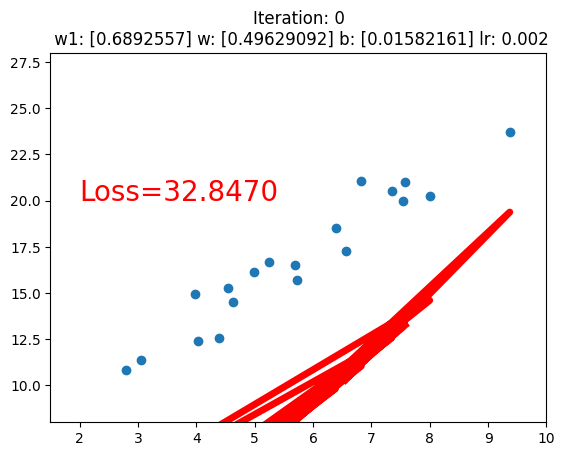

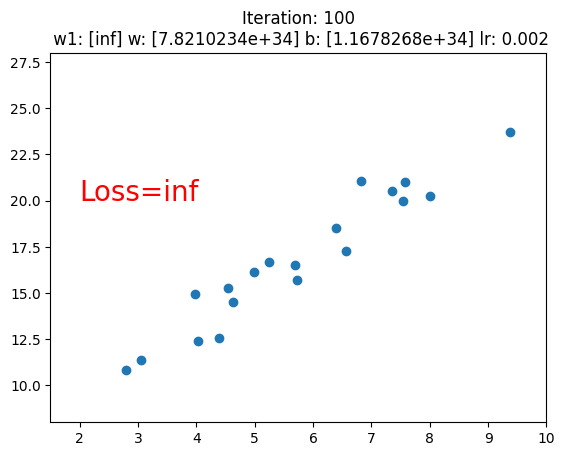

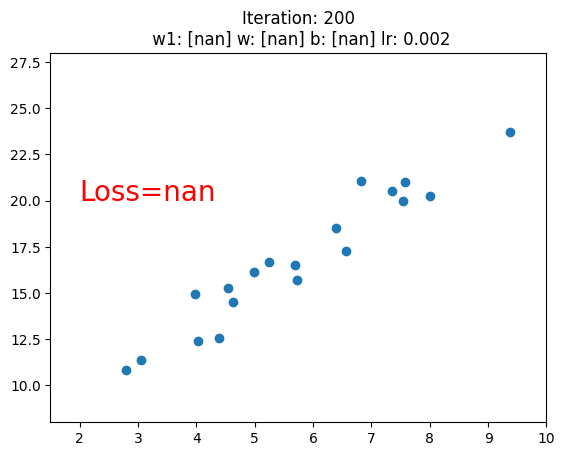

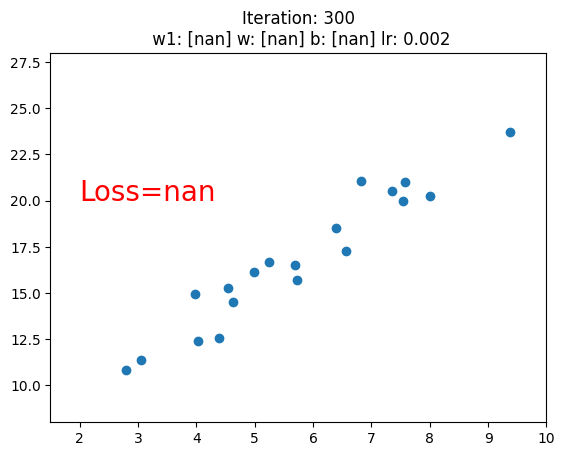

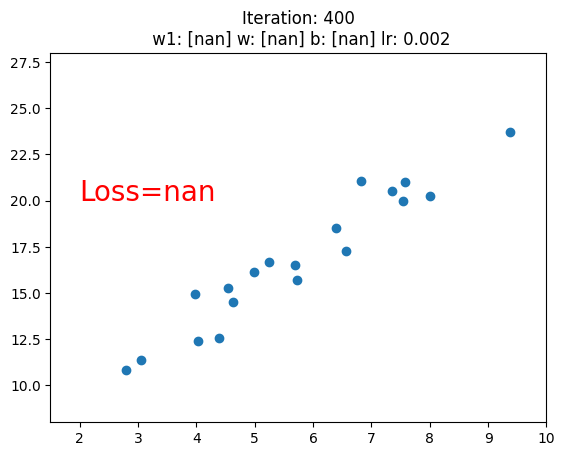

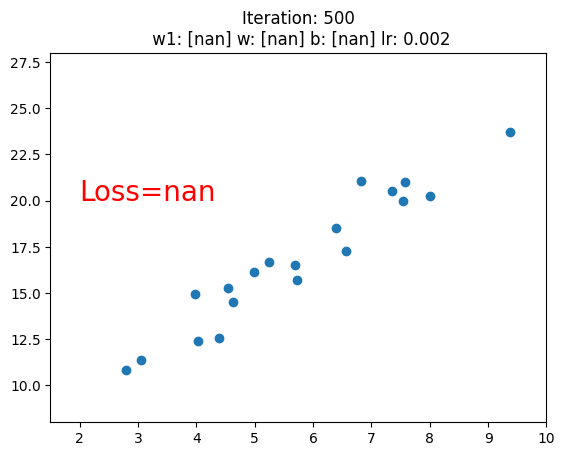

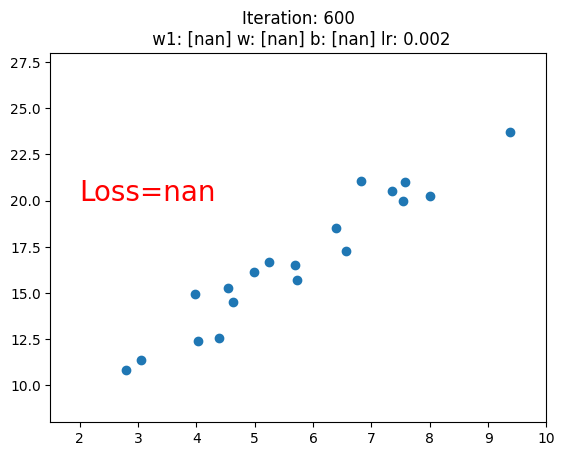

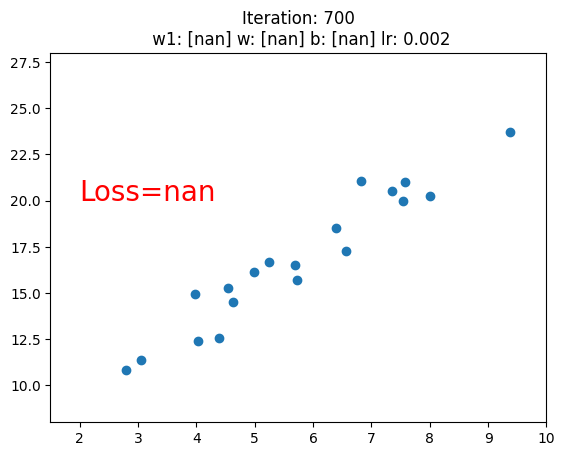

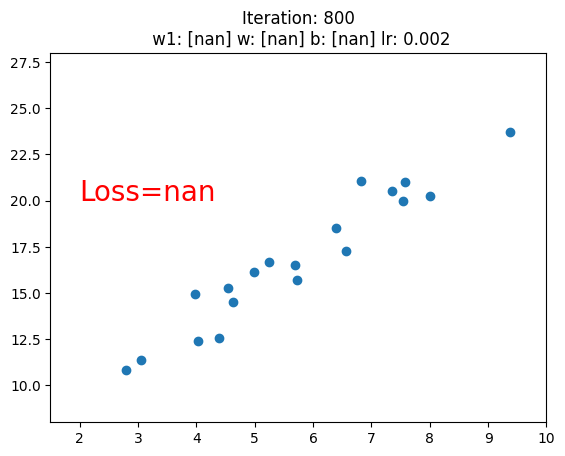

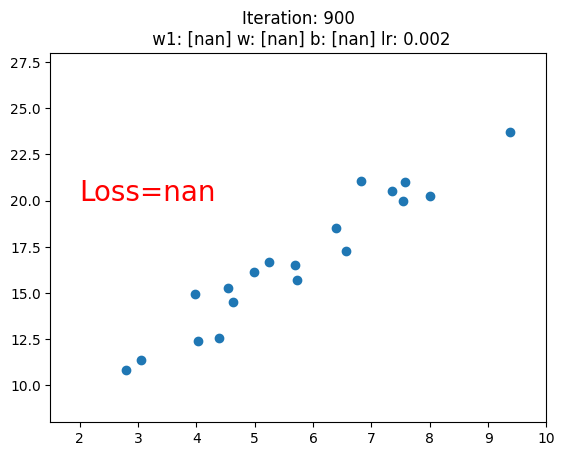

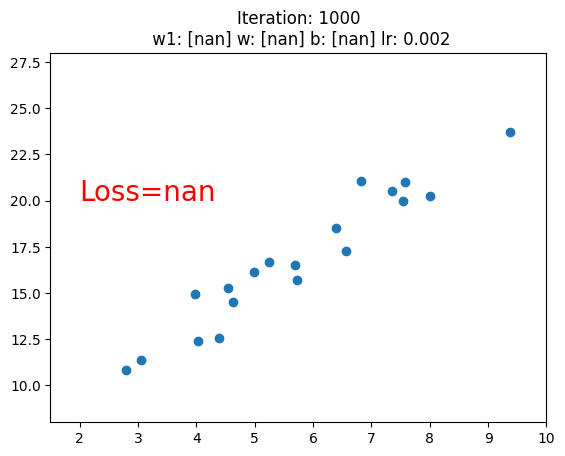

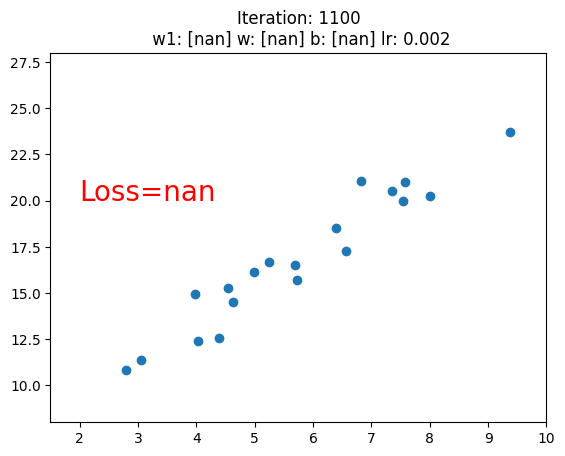

KeyboardInterrupt: 

In [24]:
import matplotlib.pyplot as plt

torch.manual_seed(1)
lr = 0.0005
lr_dec = False

# 创建训练数据
x = torch.rand(20, 1) * 10
y = 2 * x + (5 + torch.randn(20, 1))
# 假如训练数据分布为模型 y = 2 * x + 5生成

# 假如构建回归模型为 y = w1 * x**2 + w * x +b;注意学习率的调整

# 构建线性回归参数
w = torch.randn((1,), requires_grad=True)
b = torch.zeros((1,), requires_grad=True)
w1 = torch.rand((1,), requires_grad=True)

# 迭代训练
for iter in range(5000):
    # y_pred = torch.mul(w, x) + b
    y_pred = torch.mul(w1, x.pow(2)) + torch.mul(w, x) + b

    # 计算MSE loss
    loss = (0.5 * (y - y_pred) ** 2).mean()
    # 这里之所以乘以0.5，那么在计算loss的梯度时，则其梯度由2(y - y_pred)变为(y - y_pred)
    # 在使用较大学习率时，也避免了梯度爆炸的风险

    # loss 反向传播
    loss.backward()

    # 更新参数
    b.data.sub_(lr * b.grad)
    w.data.sub_(lr * w.grad)
    w1.data.sub_(lr * w1.grad)

    # 每次更新参数之后，都要清零张量梯度
    w.grad.zero_()
    b.grad.zero_()
    w1.grad.zero_()

    if iter % 100 == 0:
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=5)
        plt.text(2, 20, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.xlim(1.5, 10)
        plt.ylim(8, 28)
        # plt.title("Iteration: {}\n w: {} b: {} lr: {}".format(iter, w.data.numpy(), b.data.numpy(), lr))
        plt.title("Iteration: {}\n w1: {} w: {} b: {} lr: {}".format(iter, w1.data.numpy(), w.data.numpy(), b.data.numpy(), lr))
        plt.show()
        plt.pause(0.5)
    
    if loss.data.numpy() < 0.55 and (not lr_dec):
        lr *= 0.5
        lr_dec = True

    if loss.data.numpy() < 0.3:
        break


In [19]:
x = torch.rand(20, 1) * 10
y = 2 * x + (5 + torch.randn(20, 1))

print(x.numpy(), end=SplitLine)
print(x.data.numpy(), end=SplitLine)

print(np.array_equal(x.numpy(), x.data.numpy()))

[[8.960444  ]
 [9.728779  ]
 [3.9854126 ]
 [1.1136961 ]
 [9.923055  ]
 [3.9348693 ]
 [2.9428244 ]
 [6.218869  ]
 [1.5033776 ]
 [8.286401  ]
 [8.133663  ]
 [1.0325938 ]
 [0.89313805]
 [4.562018  ]
 [7.100127  ]
 [4.8551893 ]
 [2.464612  ]
 [5.114312  ]
 [0.30033886]
 [1.466195  ]]
[[8.960444  ]
 [9.728779  ]
 [3.9854126 ]
 [1.1136961 ]
 [9.923055  ]
 [3.9348693 ]
 [2.9428244 ]
 [6.218869  ]
 [1.5033776 ]
 [8.286401  ]
 [8.133663  ]
 [1.0325938 ]
 [0.89313805]
 [4.562018  ]
 [7.100127  ]
 [4.8551893 ]
 [2.464612  ]
 [5.114312  ]
 [0.30033886]
 [1.466195  ]]
True
